In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


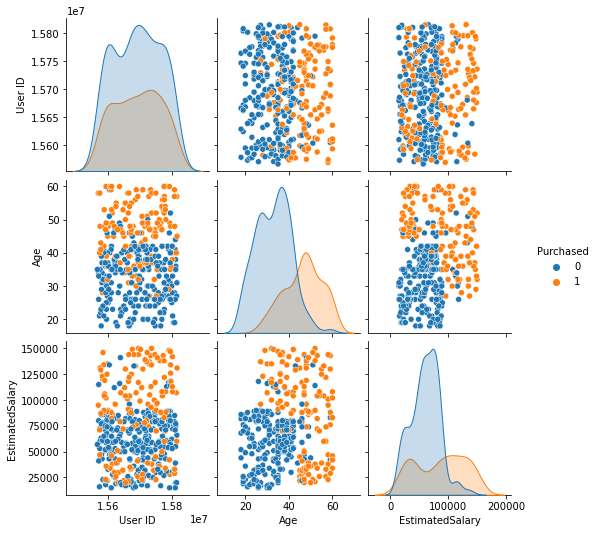

In [5]:
sns.pairplot(df,hue='Purchased')

In [6]:
df=pd.get_dummies(df,columns=['Gender'],drop_first=True)
df

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [7]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']


In [8]:
x

,User ID,Age,EstimatedSalary,Gender_Male
0,15624510,19,19000,1
1,15810944,35,20000,1
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,1
...,...,...,...,...
395,15691863,46,41000,0
396,15706071,51,23000,1
397,15654296,50,20000,0
398,15755018,36,33000,1


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)


In [10]:
y_train.value_counts()

0    206
1    114
Name: Purchased, dtype: int64

In [11]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
x_train,y_train=sampler.fit_resample(x_train,y_train)

In [12]:
y_train.value_counts()

0    206
1    206
Name: Purchased, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score

In [17]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(n_neighbors=7),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'RF':RandomForestClassifier(n_estimators=60),
    'XGBC':XGBClassifier(),
    'NB':GaussianNB()
}

In [18]:
for name,model in models.items():
    print(f'using: {name}')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'train accuarcy:{accuracy_score(y_train,model.predict(x_train))}')
    print(f'test accuarcy:{accuracy_score(y_test,y_pred)}')
    print(f'recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'f1score: {f1_score(y_test,y_pred)}')
    print(f'fbeta: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print('_'*40)

using: LR
train accuarcy:0.8592233009708737
test accuarcy:0.8375
recall: 0.7931034482758621
precision: 0.7666666666666667
f1score: 0.7796610169491527
fbeta: 0.7718120805369127
________________________________________
using: KNN
train accuarcy:0.9223300970873787
test accuarcy:0.9125
recall: 0.9310344827586207
precision: 0.84375
f1score: 0.8852459016393444
fbeta: 0.8598726114649683
________________________________________
using: DT
train accuarcy:1.0
test accuarcy:0.85
recall: 0.7931034482758621
precision: 0.7931034482758621
f1score: 0.7931034482758621
fbeta: 0.7931034482758621
________________________________________
using: SVC
train accuarcy:0.9174757281553398
test accuarcy:0.925
recall: 0.9655172413793104
precision: 0.8484848484848485
f1score: 0.9032258064516129
fbeta: 0.8695652173913043
________________________________________
using: RF
train accuarcy:1.0
test accuarcy:0.9125
recall: 0.9655172413793104
precision: 0.8235294117647058
f1score: 0.888888888888889
fbeta: 0.8484848484848483

C:\Users\mega\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train accuarcy:1.0
test accuarcy:0.9125
recall: 0.9655172413793104
precision: 0.8235294117647058
f1score: 0.888888888888889
fbeta: 0.8484848484848483
________________________________________
using: NB
train accuarcy:0.883495145631068
test accuarcy:0.8875
recall: 0.9310344827586207
precision: 0.7941176470588235
f1score: 0.8571428571428571
fbeta: 0.818181818181818
________________________________________


In [19]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [20]:
x.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Gender_Male'], dtype='object')

In [21]:
import joblib
joblib.dump(model,'model.h5')
joblib.dump(scaler,'scaler.h5')
joblib.dump(x.columns,'features.h5')

['features.h5']

## 2

In [24]:
df=pd.read_csv("Titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
df.drop(['PassengerId','Name','Cabin'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [32]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [34]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [41]:
df.dropna(axis=0,inplace=True)


In [42]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [43]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S
887,1,1,female,19.000000,0,0,112053,30.0000,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.000000,0,0,111369,30.0000,C


In [45]:
df.drop(['Ticket'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


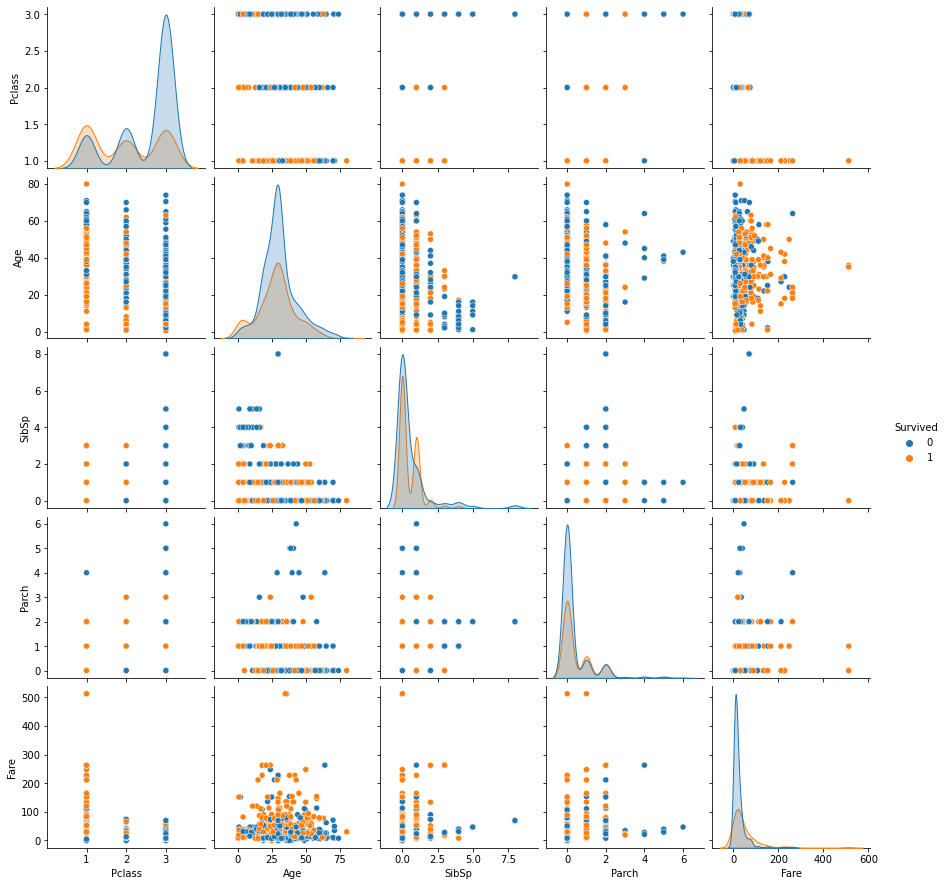

In [46]:
sns.pairplot(df,hue='Survived')

In [47]:
df=pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [48]:
x=df.drop('Survived',axis=1)
y=df['Survived']


In [49]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0
2,3,26.000000,0,0,7.9250,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1
4,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,1
887,1,19.000000,0,0,30.0000,0,0,1
888,3,29.699118,1,2,23.4500,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0


In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)


In [51]:
y_train.value_counts()

0    439
1    272
Name: Survived, dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
x_train,y_train=sampler.fit_resample(x_train,y_train)

In [53]:
y_train.value_counts()

0    439
1    439
Name: Survived, dtype: int64

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score

In [57]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(n_neighbors=7),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'RF':RandomForestClassifier(n_estimators=60),
    'XGBC':XGBClassifier(),
    'NB':GaussianNB()
}

In [58]:
for name,model in models.items():
    print(f'using: {name}')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'train accuarcy:{accuracy_score(y_train,model.predict(x_train))}')
    print(f'test accuarcy:{accuracy_score(y_test,y_pred)}')
    print(f'recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'f1score: {f1_score(y_test,y_pred)}')
    print(f'fbeta: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print('_'*40)

using: LR
train accuarcy:0.7972665148063781
test accuarcy:0.8314606741573034
recall: 0.8382352941176471
precision: 0.75
f1score: 0.7916666666666666
fbeta: 0.7661290322580645
________________________________________
using: KNN
train accuarcy:0.8553530751708428
test accuarcy:0.8314606741573034
recall: 0.8529411764705882
precision: 0.7435897435897436
f1score: 0.7945205479452054
fbeta: 0.7631578947368421
________________________________________
using: DT
train accuarcy:0.9840546697038725
test accuarcy:0.8033707865168539
recall: 0.8382352941176471
precision: 0.7037037037037037
f1score: 0.7651006711409395
fbeta: 0.7270408163265306
________________________________________
using: SVC
train accuarcy:0.8314350797266514
test accuarcy:0.8764044943820225
recall: 0.8529411764705882
precision: 0.8285714285714286
f1score: 0.8405797101449276
fbeta: 0.8333333333333334
________________________________________
using: RF
train accuarcy:0.9840546697038725
test accuarcy:0.8539325842696629
recall: 0.897058823

C:\Users\mega\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train accuarcy:0.9681093394077449
test accuarcy:0.8426966292134831
recall: 0.8529411764705882
precision: 0.7631578947368421
f1score: 0.8055555555555555
fbeta: 0.7795698924731184
________________________________________
using: NB
train accuarcy:0.7927107061503417
test accuarcy:0.8426966292134831
recall: 0.8382352941176471
precision: 0.7702702702702703
f1score: 0.8028169014084507
fbeta: 0.7829670329670328
________________________________________


In [59]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [60]:
x.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [61]:
joblib.dump(model,'model.h5')
joblib.dump(scaler,'scaler.h5')
joblib.dump(x.columns,'features.h5')

['features.h5']